<a href="https://colab.research.google.com/github/NIJAS-7/Prodigy_DS_02/blob/main/prodigyDS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DATASET LOADING***

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/New folder/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Finding Missing Values

In [31]:
df.isna().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Missing Value Handling**

In [32]:
mod=df['Age'].mode()[0]
df['Age'].fillna(mod,inplace=True)
mn=df['Cabin'].mode()[0]
df['Cabin'].fillna(mn,inplace=True)
mod=df['Embarked'].mode()[0]
df['Embarked'].fillna(mod,inplace=True)
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**LabelEncoding**

In [33]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,B96 B98,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,B96 B98,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


**Droping Unecessary Columns**

In [34]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace= True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


**EDA(EXPLORATORY DATA ANALYSIS)**

***Distribution Of Age***

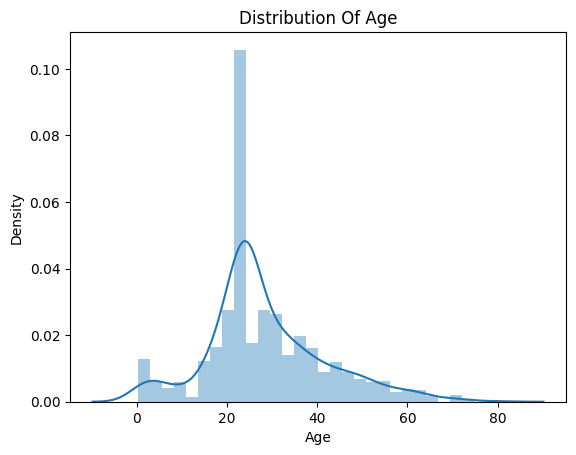

In [35]:
sns.distplot(df['Age'])
plt.title('Distribution Of Age')
plt.show()

***Disrtibution Of Fare***

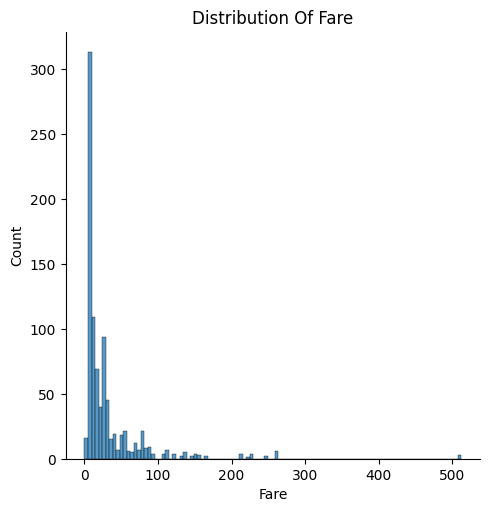

In [36]:
sns.displot(df['Fare'])
plt.title('Distribution Of Fare')
plt.show()

***BarChart For Sex***

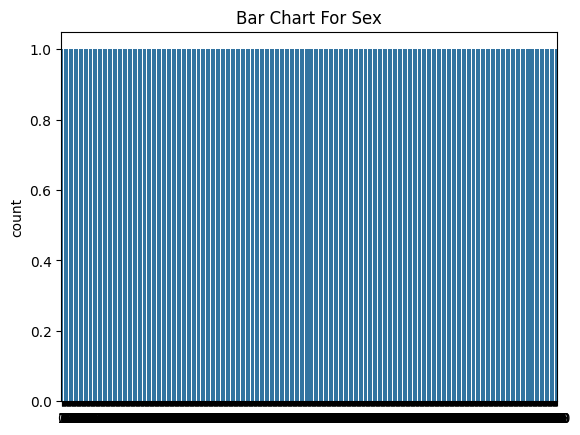

In [37]:
sns.countplot(df['Sex'])
plt.title('Bar Chart For Sex')
plt.show()

***BarChart For Class***

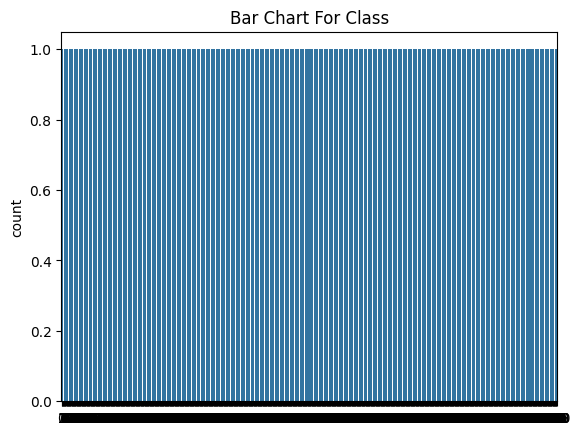

In [38]:
sns.countplot(df['Pclass'])
plt.title('Bar Chart For Class')
plt.show()

***Multivariate Analysis***

**Relationship b/w Age and Fare**

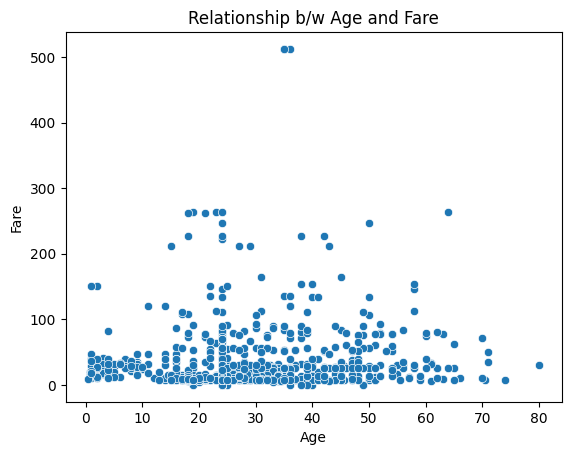

In [39]:
sns.scatterplot(x=df['Age'],y=df['Fare'])
plt.title('Relationship b/w Age and Fare')
plt.show()

**Relatioship b/w Class and Survival**

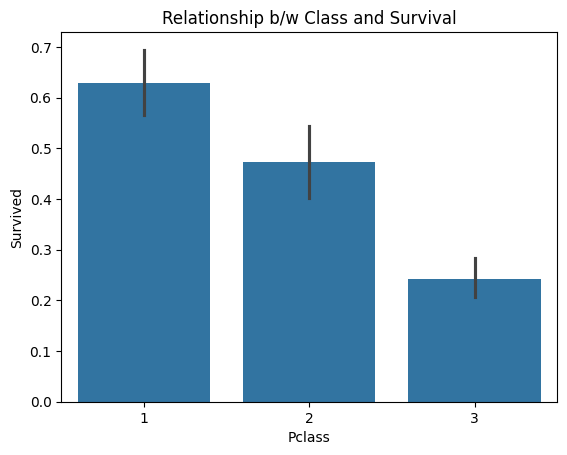

In [40]:
sns.barplot(x=df['Pclass'],y=df['Survived'])
plt.title('Relationship b/w Class and Survival')
plt.show()

**Relationship b/w Sex and Survival**

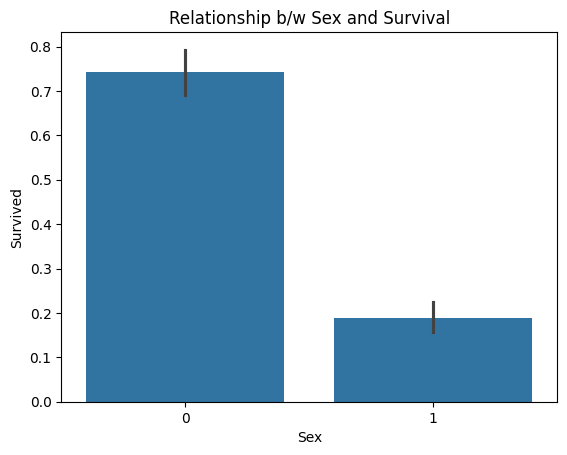

In [41]:
sns.barplot(x=df['Sex'],y=df['Survived'])
plt.title('Relationship b/w Sex and Survival')
plt.show()

**Correlation Matrix**

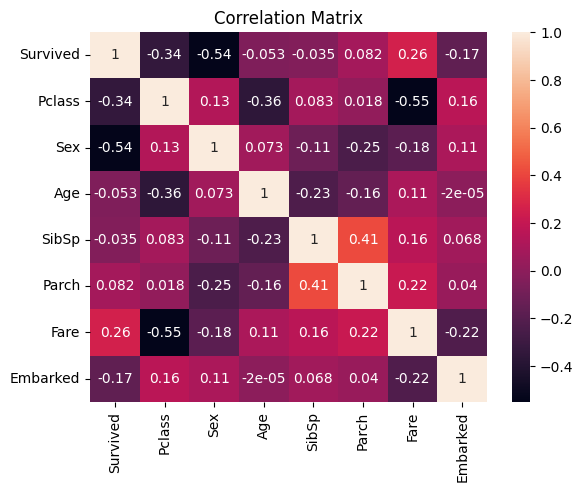

In [42]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()
